# The Human Index

### El índice de libertad humana se desglosa en los índices que graficamos a continuación:

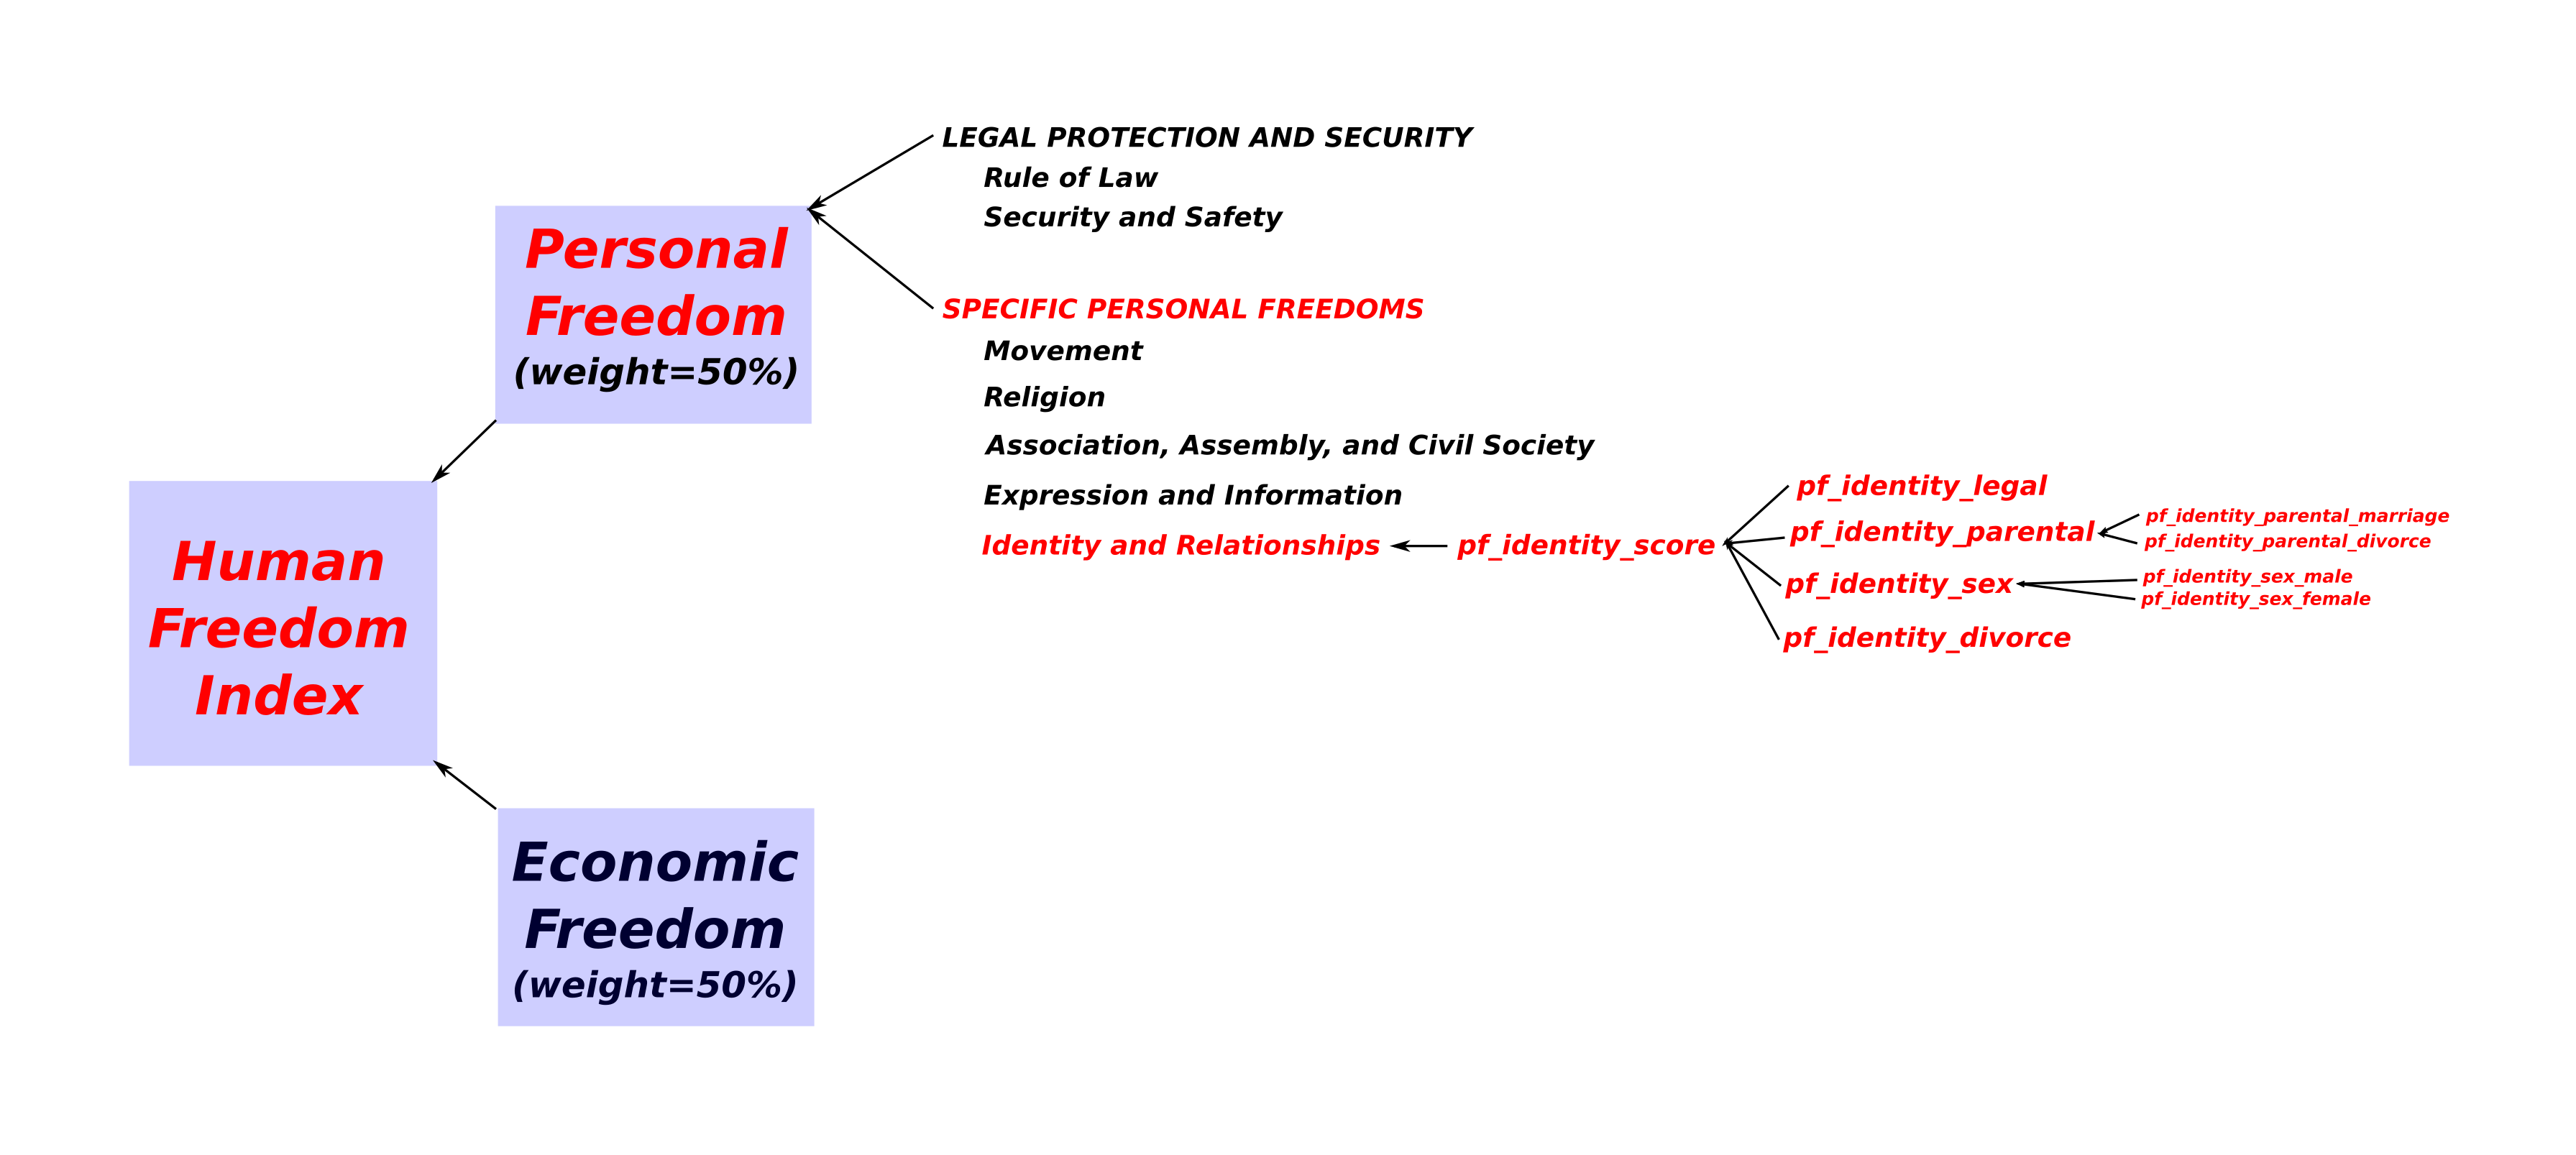

In [1]:
from PIL import Image # to load images 
from IPython.display import display # to display images 
pil_im = Image.open('drawing.png') 
display(pil_im)

# 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

In [2]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
from scipy import stats

seaborn.__version__
seaborn.set_context(context='talk', font_scale=1.2)

dataset = pandas.read_csv('hfi_cc_2018.csv')
dataset.shape

important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

Descripción resumida del dataset:

In [3]:
dataset.describe()

,year,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
count,1458.000000,880.000000,880.000000,880.000000,1378.000000,1378.000000,1369.000000,1378.000000,1279.000000,1378.000000,...,1283.000000,1357.000000,1368.000000,1374.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,5.589355,5.474770,5.044070,5.309641,7.412980,8.341855,9.519458,6.772869,9.584972,...,4.886192,7.698494,6.981858,6.317668,7.019782,6.785610,76.973149,6.993444,77.007983,2.490566
std,2.582875,2.080957,1.428494,1.724886,1.529310,2.832947,3.225902,1.744673,2.768983,1.559826,...,1.889168,1.728507,1.979200,1.230988,1.027625,0.883601,44.540142,1.025811,44.506549,1.119698
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.009841,2.483540,2.880000,1.000000,3.765827,1.000000,1.000000
25%,2010.000000,4.133333,4.549550,3.789724,4.131746,6.386978,10.000000,10.000000,5.000000,9.942607,...,3.433786,6.874687,6.368178,5.591851,6.429498,6.250000,38.000000,6.336685,39.000000,1.000000
50%,2012.000000,5.300000,5.300000,4.575189,4.910797,8.638278,10.000000,10.000000,7.500000,10.000000,...,4.418371,8.074161,7.466692,6.265234,7.082075,6.900000,77.000000,6.923840,76.000000,2.000000
75%,2014.000000,7.389499,6.410975,6.400000,6.513178,9.454402,10.000000,10.000000,10.000000,10.000000,...,6.227978,8.991882,8.209310,7.139718,7.720955,7.410000,115.000000,7.894660,115.000000,3.000000
max,2016.000000,9.700000,8.773533,8.719848,8.723094,9.926568,10.000000,10.000000,10.000000,10.000000,...,9.623811,9.999638,9.865488,9.272600,9.439828,9.190000,162.000000,9.126313,162.000000,4.000000


Aparentemente los índices van de 0 a 10, coincidentemente con lo descripto en el documento https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2018-revised.pdf

## 1. 1. Calcular el rango de las variables.



In [4]:
columnas_numericas = [col for col in dataset.columns if 'pf_identity' in col]
columnas_numericas += ['ef_score', 'ef_rank', 'hf_score', 'hf_rank']

data = []
for fun in [min, max, lambda x: max(x)-min(x)]:
    data.append({col: fun(dataset[col]) for col in columnas_numericas})
data = pandas.DataFrame(data)
data = data.rename(index={0:"min", 1:"max", 2:"rango"})
data

,ef_rank,ef_score,hf_rank,hf_score,pf_identity,pf_identity_divorce,pf_identity_legal,pf_identity_parental,pf_identity_parental_divorce,pf_identity_parental_marriage,pf_identity_sex,pf_identity_sex_female,pf_identity_sex_male
min,1.0,2.88,1.0,3.765827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,162.0,9.19,162.0,9.126313,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
rango,161.0,6.31,161.0,5.360486,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


Efectivamente el rango de las variables es de 0 a 10. 

## 1.2. Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo y compararla con la de Latinoamérica y el caribe. 

Hacemos primero un calculo total, y luego por a;o.

In [5]:
datos_latinoamerica = dataset[dataset['region'] == 'Latin America & the Caribbean']
datos_resto_mundo = dataset[dataset['region'] != 'Latin America & the Caribbean']

scores_importantes = ['hf_score', 'ef_score', 'pf_identity']

### Human freedom, econimic freedom y personal freedom identity todo el mundo

In [6]:
data = []
for fun in [lambda x: x.mean(), lambda x: x.median(), lambda x: x.std()]:
    data.append({col: fun(dataset[col]) for col in scores_importantes})
data = pandas.DataFrame(data)
data = data.rename(index={0:"mean", 1:"median", 2:"std"})
data


,ef_score,hf_score,pf_identity
mean,6.785610,6.993444,7.334180
median,6.900000,6.923840,9.166667
std,0.883601,1.025811,3.159473


### Human freedom, economic freedom y personal freedom identity Latinoamerica 

In [7]:
data = []
for fun in [lambda x: x.mean(), lambda x: x.median(), lambda x: x.std()]:
    data.append({col: fun(datos_latinoamerica[col]) for col in scores_importantes})
data = pandas.DataFrame(data)
data = data.rename(index={0:"mean", 1:"median", 2:"std"})
data

,ef_score,hf_score,pf_identity
mean,6.734871,7.047982,8.765086
median,6.900000,7.028045,10.000000
std,0.870565,0.608904,1.711732


No tiene sentido calcular la moda de un conjunto de valores flotantes. 
Si se desea obtener la distribucion de valores es necesario calcular un histograma.

### Human freedom, economic freedom y personal freedom identity anualizadas todo el mundo

Ahora calculamos lo mismo de manera anualizada

In [8]:
for anio in range(2008,2017):
    year_data = dataset[dataset['year']==anio]
    data = []
    for fun in [lambda x: x.mean(), lambda x: x.median(), lambda x: x.std()]:
        data.append({col: fun(year_data[col]) for col in scores_importantes})
    data = pandas.DataFrame(data)
    data = data.rename(index={0:"mean", 1:"median", 2:"std"})
    print("------------------------------------------")
    print("----------Year: %d----------------------"%anio)
    print(data)

------------------------------------------
----------Year: 2008----------------------
        ef_score  hf_score  pf_identity
mean    6.742270  7.069785      7.51773
median  6.830000  7.005013     10.00000
std     0.934473  1.015464      3.14098
------------------------------------------
----------Year: 2009----------------------
        ef_score  hf_score  pf_identity
mean    6.759504  7.075678      7.51773
median  6.900000  6.995549     10.00000
std     0.853709  0.979946      3.14098
------------------------------------------
----------Year: 2010----------------------
        ef_score  hf_score  pf_identity
mean    6.766013  7.036396     7.303922
median  6.850000  6.949657    10.000000
std     0.854033  0.976358     3.350783
------------------------------------------
----------Year: 2011----------------------
        ef_score  hf_score  pf_identity
mean    6.803399  7.031203     7.467320
median  6.920000  6.987844    10.000000
std     0.854159  0.999191     3.151035
----------------

### Human freedom, economic freedom y personal freedom identity anualizadas Latinoamerica

In [9]:
for anio in range(2008,2017):
    year_data = datos_latinoamerica[datos_latinoamerica['year']==anio]
    data = []
    for fun in [lambda x: x.mean(), lambda x: x.median(), lambda x: x.std()]:
        data.append({col: fun(year_data[col]) for col in scores_importantes})
    data = pandas.DataFrame(data)
    data = data.rename(index={0:"mean", 1:"median", 2:"std"})
    print("------------------------------------------")
    print("----------Year: %d----------------------"%anio)
    print(data)

------------------------------------------
----------Year: 2008----------------------
        ef_score  hf_score  pf_identity
mean    6.768000  7.118196     8.900000
median  6.760000  7.035120    10.000000
std     0.759413  0.577066     1.779513
------------------------------------------
----------Year: 2009----------------------
        ef_score  hf_score  pf_identity
mean    6.773600  7.113860     8.900000
median  6.950000  6.997731    10.000000
std     0.719026  0.560117     1.779513
------------------------------------------
----------Year: 2010----------------------
        ef_score  hf_score  pf_identity
mean    6.723846  7.087213     8.942308
median  6.740000  7.081519    10.000000
std     0.777962  0.580037     1.756855
------------------------------------------
----------Year: 2011----------------------
        ef_score  hf_score  pf_identity
mean    6.763462  7.084865     9.038462
median  6.910000  7.029195    10.000000
std     0.801942  0.564031     1.669869
----------------

## 1.3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?


Si bien podemos ver una cierta correlación entre Human Freedom Score y Personal Freedom Identity, el Economic Freedom Score influye directamente sobre los anteriores.
El EF_Score es inherentemente valuable, empodera a los individuos a ejercer sus otras libertades.

El human freedom score nos da una idea de la libertad de las personas, y el economic freedom score influye fuertemente en este. Para calcular este indice se utiliza el Economic Freedom of the World index con mediciones que se consideran de Libertad Personal. 

El ef_score es ponderado con alto peso en el calculo del hf_score, por lo que tienen una alta correlacion.

## 1.4. ¿Cómo pueden sanearse los valores faltantes?

Utilizando el metodo dropnan que otorgan los DataFrame de Pandas, es posible desestimar los valores nan (not a number). 

## 1.5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

### *pf_identity* 

In [10]:
q1 = dataset["pf_identity"].quantile(0.25)
q3 = dataset["pf_identity"].quantile(0.75)
iqr = q3-q1
outliers = dataset[(dataset["pf_identity"] >= (q3 + 1.5 * iqr) ) | (dataset["pf_identity"] <= (q1 - 1.5 * iqr))]
outliers['pf_identity']

Series([], Name: pf_identity, dtype: float64)

En el caso de *pf_identity* no podemos encontrar outliers utilizando el rango intercuartílico.

### *pf_identity* en Latinoamerica

In [11]:
data = dataset[dataset['region'] == 'Latin America & the Caribbean']
q1 = data["pf_identity"].quantile(0.25)
q3 = data["pf_identity"].quantile(0.75)
iqr = q3-q1
outliers = data[(data["pf_identity"] >= (q3 + 1.5 * iqr) ) | (data["pf_identity"] <= (q1 - 1.5 * iqr))]
outliers['pf_identity']

Series([], Name: pf_identity, dtype: float64)

Se observa un comportamiento similar a nivel regional (Latinoamerica) y a nivel mundial. Ambas muestras carecen de outliers.

### *hf_score* 

In [12]:
q1 = dataset["hf_score"].quantile(0.25)
q3 = dataset["hf_score"].quantile(0.75)
iqr = q3-q1
outliers = dataset[(dataset["hf_score"] >= (q3 + 1.5 * iqr) ) | (dataset["hf_score"] <= (q1 - 1.5 * iqr))]
outliers["hf_score"]

141    3.765827
303    3.910826
Name: hf_score, dtype: float64

Para el caso del *hf_score* encontramos dos outliers utilizando el rango intercuartílico.

### *hf_score*  en Latinoamerica

In [13]:
data = dataset[dataset['region'] == 'Latin America & the Caribbean']
q1 = data["hf_score"].quantile(0.25)
q3 = data["hf_score"].quantile(0.75)
iqr = q3-q1
outliers = data[(data["hf_score"] >= (q3 + 1.5 * iqr) ) | (data["hf_score"] <= (q1 - 1.5 * iqr))]
outliers["hf_score"]

157     4.200724
319     4.241750
481     4.573730
643     5.013857
679     8.219911
805     5.225650
841     8.290152
967     5.332458
1003    8.271367
1129    5.156619
1165    8.249136
1291    5.283514
1327    8.227215
1453    5.257879
Name: hf_score, dtype: float64

Utilizando el rango intercuartílico encontramos 14 outliers.

### Comparación gráfica

In [14]:
data = dataset[dataset['region'] == 'Latin America & the Caribbean']
data["_label"] = "Latinoamerica"
dataset["_label"] = "Mundo entero"

df = pandas.concat([data,dataset])

/home/madoery/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


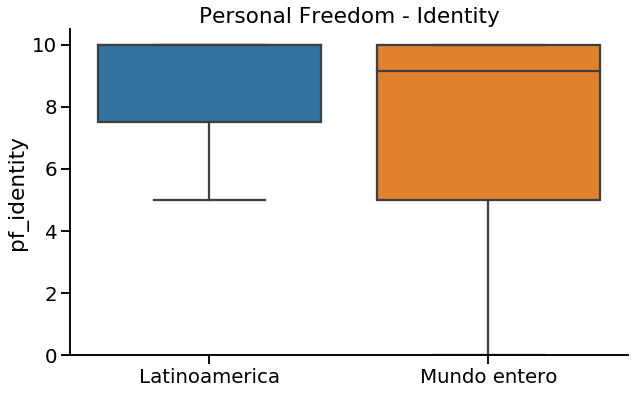

In [15]:
plt.figure(figsize=(10, 6))
ax = seaborn.boxplot(data=df, x="_label", y='pf_identity')
ax.set(xlabel="", title = "Personal Freedom - Identity" )
plt.ylim((0,10.5))
seaborn.despine()

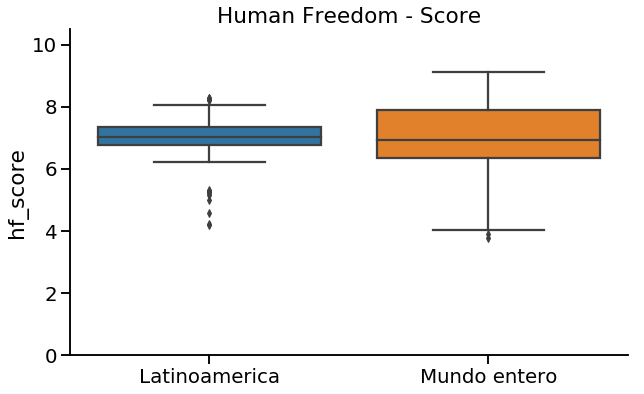

In [16]:
plt.figure(figsize=(10, 6))
ax = seaborn.boxplot(data=df, x="_label", y='hf_score')
ax.set(xlabel="", title = "Human Freedom - Score" )
plt.ylim((0,10.5))
seaborn.despine()

Si bien en la muestra correspondiente a latinoamerica encontramos 14 outliers no consideramos coneveniente eliminarlos ya que esos puntos llevados a la muestra mundial dejan de serlo. 

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

## 2.1. Media pf_identity, hf_score, ef_score a traves de los años

/home/madoery/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


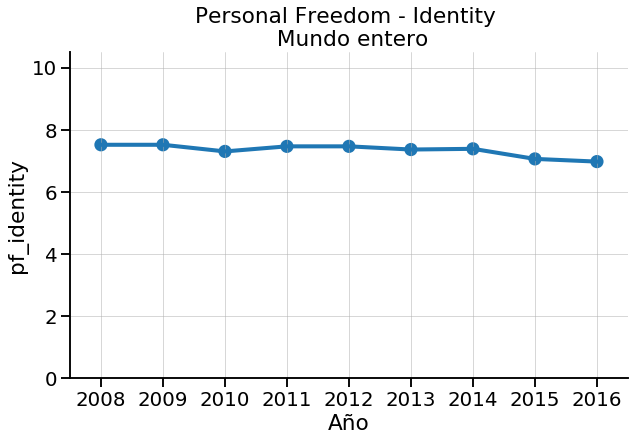

In [17]:
plt.figure(figsize=(10, 6))
ax = seaborn.pointplot(data = dataset,x='year', y='pf_identity', ci=0)
plt.ylim((0,10.5))
ax.set(xlabel='Año', title = 'Personal Freedom - Identity \n Mundo entero')
plt.grid(linewidth=0.5)
seaborn.despine()

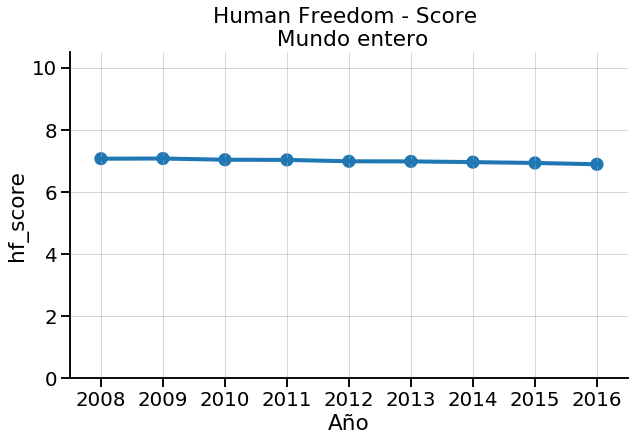

In [18]:
plt.figure(figsize=(10, 6))
ax = seaborn.pointplot(data = dataset,x='year', y='hf_score', ci=0)
plt.ylim((0,10.5))
ax.set(xlabel='Año', title = 'Human Freedom - Score \n Mundo entero')
plt.grid(linewidth=0.5)
seaborn.despine()

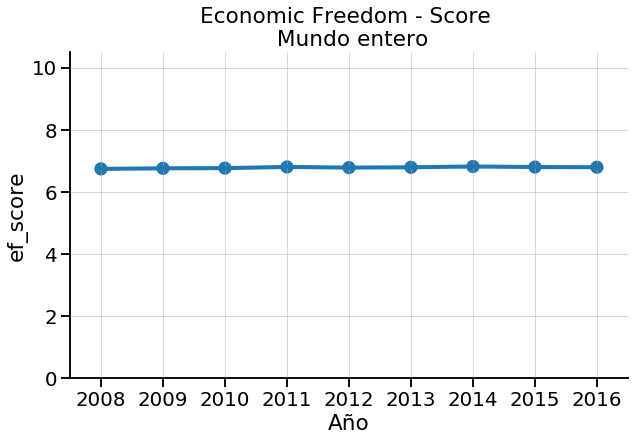

In [19]:
plt.figure(figsize=(10, 6))
ax = seaborn.pointplot(data = dataset,x='year', y='ef_score', ci=0)
plt.ylim((0,10.5))
ax.set(xlabel='Año', title = 'Economic Freedom - Score \n Mundo entero')
plt.grid(linewidth=0.5)
seaborn.despine()

## 2.2 Evolución por región


### Personal Freedom - Identity

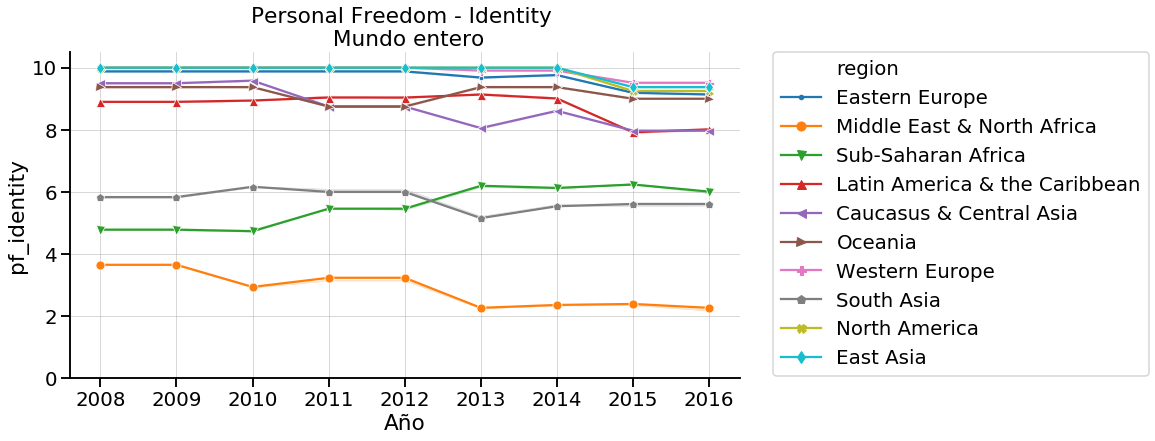

In [20]:
plt.figure(figsize=(12,6))
ax = seaborn.lineplot(data=dataset, x='year', y='pf_identity', hue='region', style="region", markers=[".", "o", "v", "^", "<", ">", "P", "p", "X", "d" ], dashes=False,  ci=0)
plt.ylim((0,10.5))
ax.set(xlabel='Año', title = 'Personal Freedom - Identity \n Mundo entero')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(linewidth=0.5)
seaborn.despine()

### Human Freedom - Score

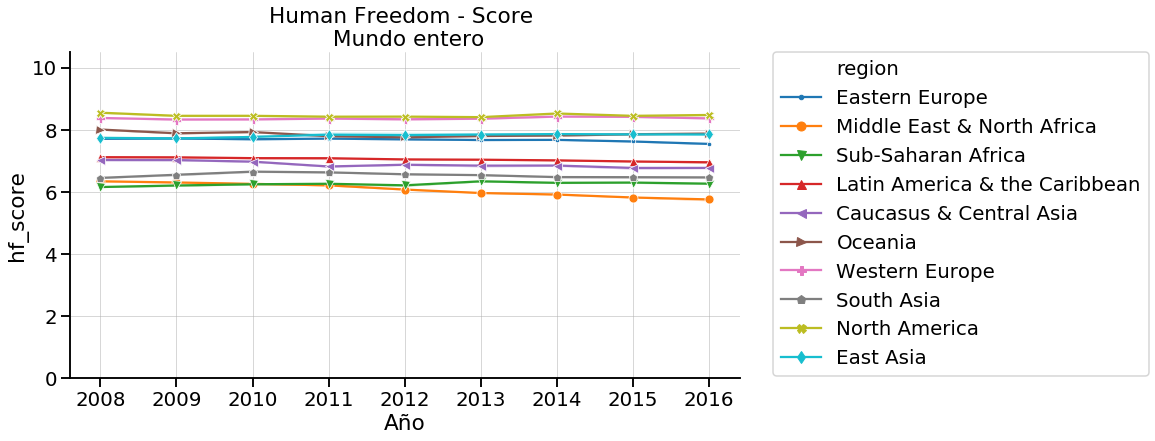

In [21]:
plt.figure(figsize=(12,6))
ax = seaborn.lineplot(data=dataset, x='year', y='hf_score', hue='region', style="region", markers=[".", "o", "v", "^", "<", ">", "P", "p", "X", "d" ], dashes=False,  ci=0)
plt.ylim((0,10.5))
ax.set(xlabel='Año', title = 'Human Freedom - Score \n Mundo entero')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(linewidth=0.5)
seaborn.despine()

Detalle del gráfico anterior en rango relevante:

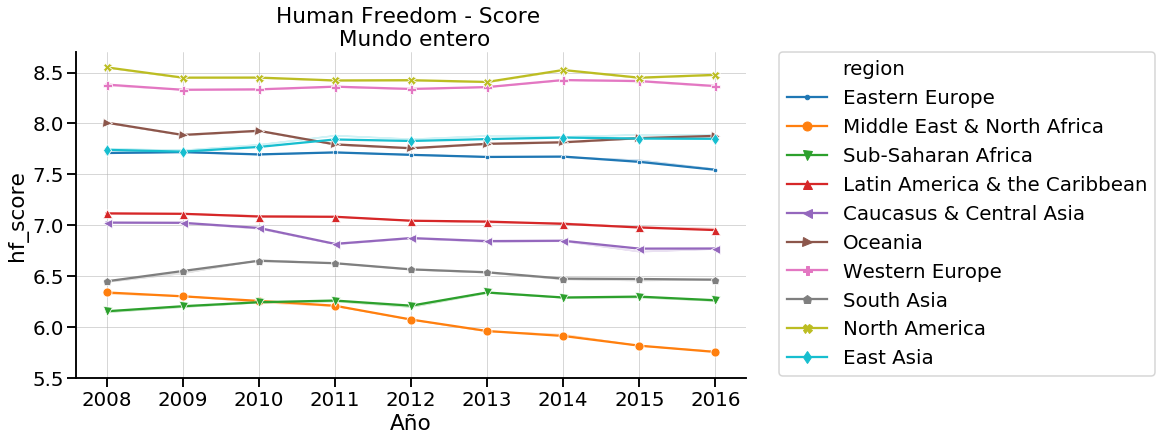

In [22]:
plt.figure(figsize=(12,6))
ax = seaborn.lineplot(data=dataset, x='year', y='hf_score', hue='region', style="region", markers=[".", "o", "v", "^", "<", ">", "P", "p", "X", "d" ], dashes=False,  ci=0)
plt.ylim((5.5,8.7))
ax.set(xlabel='Año', title = 'Human Freedom - Score \n Mundo entero')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(linewidth=0.5)
seaborn.despine()

### Economic Freedom - Score

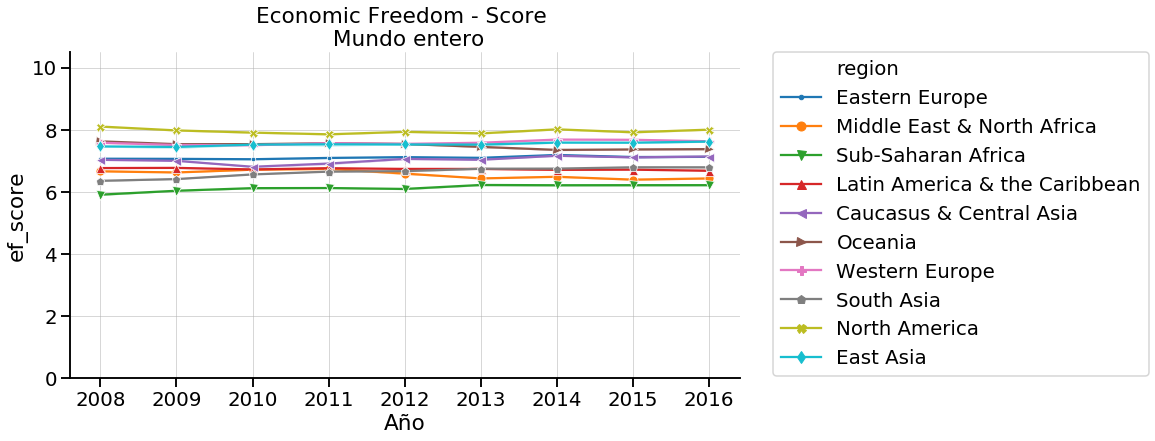

In [23]:
plt.figure(figsize=(12,6))
ax = seaborn.lineplot(data=dataset, x='year', y='ef_score', hue='region', style="region", markers=[".", "o", "v", "^", "<", ">", "P", "p", "X", "d" ], dashes=False,  ci=0)
plt.ylim((0,10.5))
ax.set(xlabel='Año', title = 'Economic Freedom - Score \n Mundo entero')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(linewidth=0.5)
seaborn.despine()

Detalle del gráfico anterior en rango relevante:

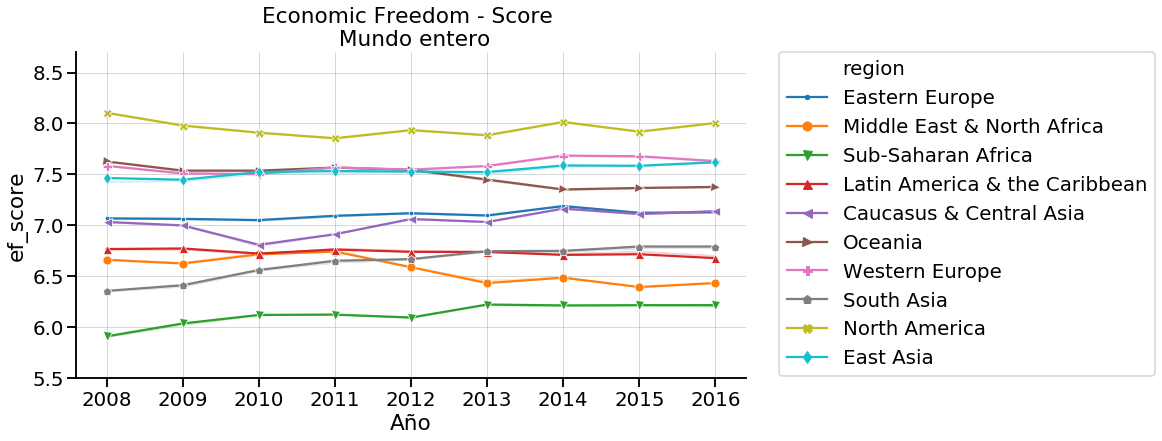

In [24]:
plt.figure(figsize=(12,6))
ax = seaborn.lineplot(data=dataset, x='year', y='ef_score', hue='region', style="region", markers=[".", "o", "v", "^", "<", ">", "P", "p", "X", "d" ], dashes=False,  ci=0)
plt.ylim((5.5,8.7))
ax.set(xlabel='Año', title = 'Economic Freedom - Score \n Mundo entero')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(linewidth=0.5)
seaborn.despine()

## 3. Dividimos tendencias latinoamericanas por paises


Cantidad de paises sin variacion:  9


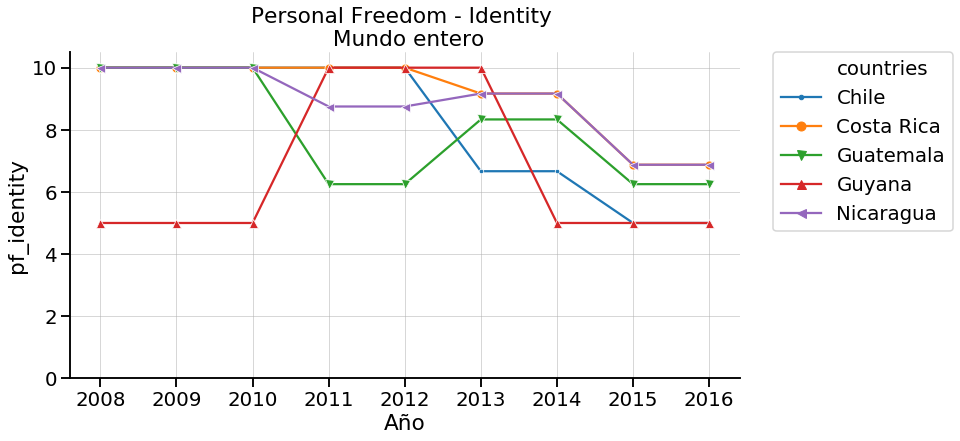

In [25]:
varianzas = [{'countries': var, 'varianza': datos_latinoamerica[datos_latinoamerica['countries'] == var]['pf_identity'].std()} for var in list(set(datos_latinoamerica['countries']))]
varianzas = sorted(varianzas, key=lambda k: k['varianza']) 

print('Cantidad de paises sin variacion: ',len([y for y in varianzas if y['varianza'] == 0]))

varianzas = [varianzas[i] for i in range(-1,-6,-1)]
varianzas


filtered_countries = [var['countries'] for var in varianzas] 
data = dataset[dataset['countries'].isin(filtered_countries)]


plt.figure(figsize=(12,6))
ax = seaborn.lineplot(data=data, x='year', y='pf_identity', hue='countries', style="countries", markers=[".", "o", "v", "^", "<", ">", "P", "p", "X", "d" ], dashes=False,  ci=0)
plt.ylim((0,10.5))
ax.set(xlabel='Año', title = 'Personal Freedom - Identity \n Mundo entero')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(linewidth=0.5)
seaborn.despine()


/home/madoery/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/madoery/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


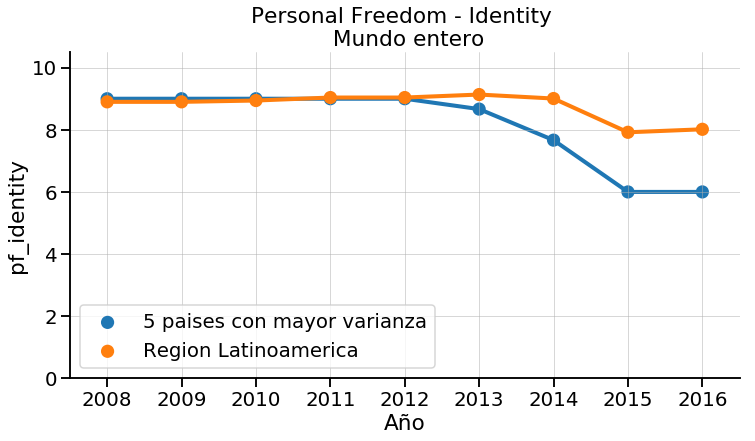

In [26]:
plt.figure(figsize=(12,6))

datos_latinoamerica["_label"] = 'Region Latinoamerica'
data["_label"] = '5 paises con mayor varianza'

df = pandas.concat([data, datos_latinoamerica])

ax = seaborn.pointplot(data=df, x='year', y='pf_identity', hue="_label", ci=0)
plt.ylim((0,10.5))
ax.set(xlabel='Año', title = 'Personal Freedom - Identity \n Mundo entero')
ax.set(xlabel='Año')
plt.grid(linewidth=0.5)
plt.legend()
seaborn.despine()


Los paises se seleccionaron de acuerdo a el desvio estandar. 
Hay 9 paises que no varian, del resto seleccionamos los 5 de mayor desviacion estandar. 

Se puede observar que la tendencia regional está dominada por el comportamiento de los paises con mayor variación. Mostrando una caida en el *pf_identity* a partir del año 2012.

# 3. Distribuciones

  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar ambas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

## 3.1. Graficar en un mismo histograma la distribución de la variable pf_identity en global, y en Latinoamérica y el caribe. Repetir para la variable hf_score. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

A continuación se observan las distribuciones del Personal Freedom Identity para Latinoamérica y para el Mundo entero.

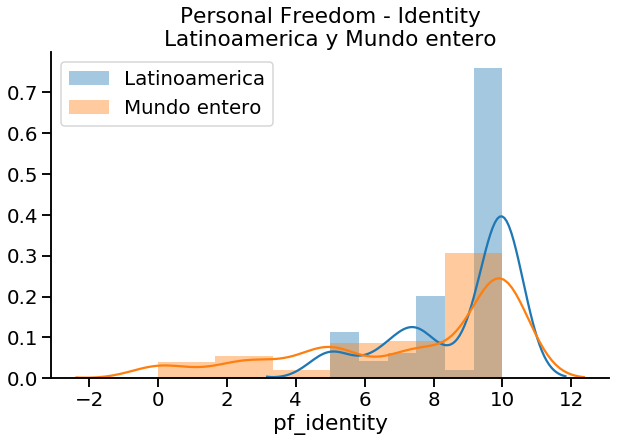

In [27]:
plt.figure(figsize=(10,6))
ax = seaborn.distplot(datos_latinoamerica['pf_identity'].dropna(), bins = 6, label='Latinoamerica')
seaborn.distplot(dataset['pf_identity'].dropna(), bins = 6, label='Mundo entero')
plt.legend()
ax.set_title("Personal Freedom - Identity\nLatinoamerica y Mundo entero")
seaborn.despine()

Continuamos con las distribuciones de Human Freedom Score para Latinoamerica y el Mundo entero

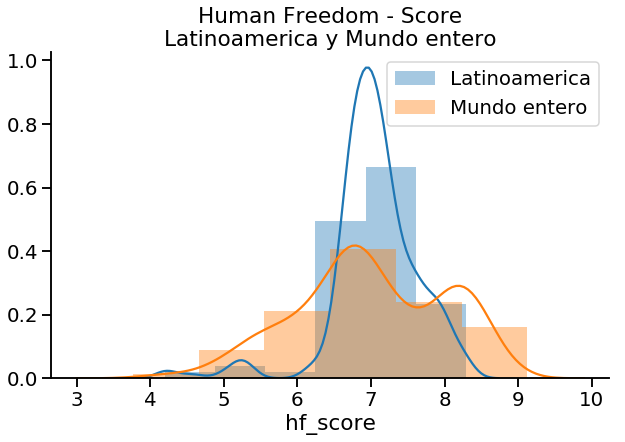

In [28]:
plt.figure(figsize=(10,6))
ax = seaborn.distplot(datos_latinoamerica['hf_score'].dropna(), bins = 6, label='Latinoamerica')
seaborn.distplot(dataset['hf_score'].dropna(), bins = 6, label='Mundo entero')
plt.legend()
ax.set_title("Human Freedom - Score\nLatinoamerica y Mundo entero")
seaborn.despine()

***Como conclusión podemos decir que con respecto al pf_identity, las distribuciones tienen un amplio sesgo hacia la derecha.***

***Con respecto al hf_score, las distribuciones se aproximan a una normal.***

## 3.2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior.

Para hacer el KSTEST debemos normalizar los valores para poder compararlos con los de la distribucion normal estandar. 

Empezamos con el pf_identity para Latinoamerica.

***Debido a que el p-value es 0, esto nos permite rechazar la hipótesis nula (H0) 
de que la distribución sea normal.***

KstestResult(statistic=0.35088781204626546, pvalue=0.0)


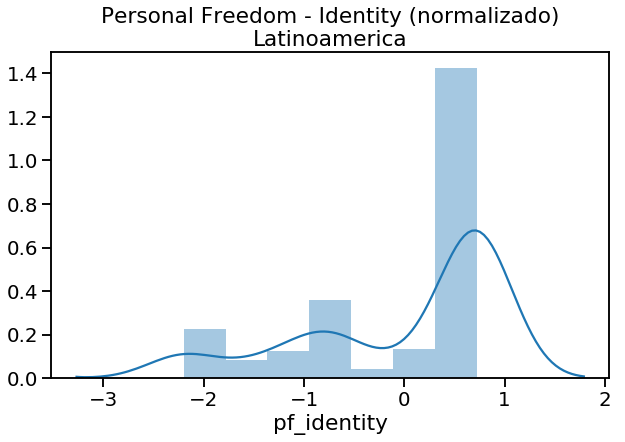

In [29]:
media_latinoamerica_pf = datos_latinoamerica['pf_identity'].dropna().mean()
desvio_latinoamerica_pf = datos_latinoamerica['pf_identity'].dropna().std()
plt.figure(figsize=(10,6))
ax = seaborn.distplot((datos_latinoamerica['pf_identity'].dropna() - media_latinoamerica_pf)/desvio_latinoamerica_pf, bins = 7)
ax.set_title("Personal Freedom - Identity (normalizado)\nLatinoamerica")
print(stats.kstest(((datos_latinoamerica['pf_identity'].dropna()) - media_latinoamerica_pf)/desvio_latinoamerica_pf, 'norm'))

Hacemos lo mismo con el Human Freedom Score para Latinoamerica. 

***En este caso el p-value es 4.739e-05 que resulta mucho menor a 0.05. 
Esto nos permite nuevamente rechazar la hipótesis nula (H0) 
de que la distribución sea normal.***

KstestResult(statistic=0.1504746027707088, pvalue=4.737935317389308e-05)


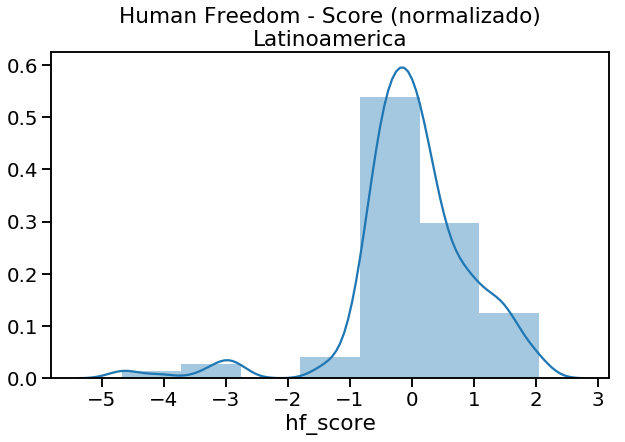

In [46]:
media_latinoamerica_hf = datos_latinoamerica['hf_score'].dropna().mean()
desvio_latinoamerica_hf = datos_latinoamerica['hf_score'].dropna().std()
plt.figure(figsize=(10,6))
ax = seaborn.distplot((datos_latinoamerica['hf_score'].dropna() - media_latinoamerica_hf)/desvio_latinoamerica_hf, bins = 7)
ax.set_title("Human Freedom - Score (normalizado)\nLatinoamerica")
print(stats.kstest(((datos_latinoamerica['hf_score'].dropna()) - media_latinoamerica_hf)/desvio_latinoamerica_hf, 'norm'))

## 3.3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar ambas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas. 

En este caso, calculamos la media y desvio de nuestro dataset y luego hacemos un dataset aleatorio de una distro normal, utilizando muestra y desvio obtenidos sobre nuestros datos. 

Empezamos con pf_identity.

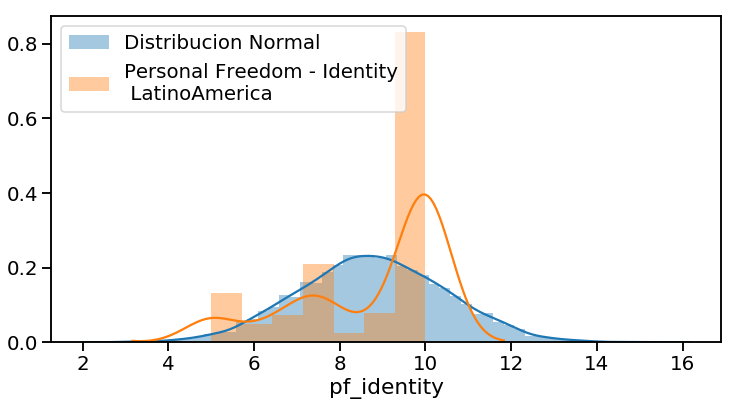

In [54]:
loc, scale = stats.norm.fit(datos_latinoamerica['pf_identity'].dropna())

distribucion_normal = stats.norm(loc, scale)
muestra = distribucion_normal.rvs(10000)

plt.figure(figsize=(12,6))
seaborn.distplot(muestra, label='Distribucion Normal')
seaborn.distplot(datos_latinoamerica['pf_identity'].dropna(), label='Personal Freedom - Identity\n LatinoAmerica')

plt.legend(loc="upper left")

A simple vista, la distribución no parece normal. Dibujamos el QQ plot. 

***Observamos que cerca del valor 10 se concentra el sesgo de la distribución de nuestra muestra***.

In [32]:
percentiles = numpy.linspace(0, 100, 21)
qn_muestras = numpy.percentile(datos_latinoamerica['pf_identity'].dropna(), percentiles)
qn_distribucion_normal = numpy.percentile(distribucion_normal.rvs(len(datos_latinoamerica['pf_identity'].dropna())), percentiles)

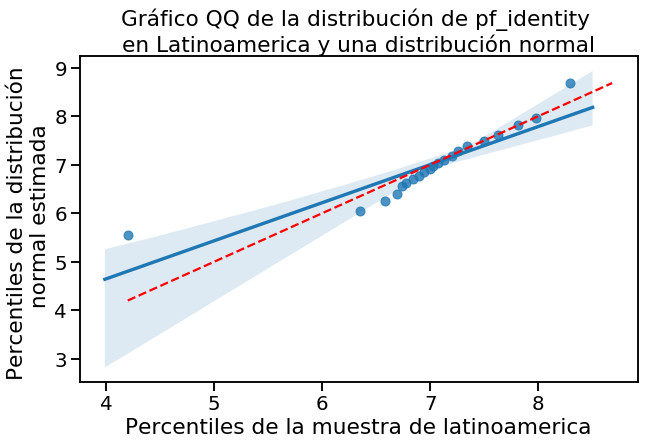

In [66]:
plt.figure(figsize=(10,6))
ax = seaborn.regplot(x=qn_muestras, y=qn_distribucion_normal)
ax.set_xlabel('Percentiles de la muestra de latinoamerica')
ax.set_ylabel('Percentiles de la distribución \n normal estimada')
ax.set_title('Gráfico QQ de la distribución de pf_identity \nen Latinoamerica y una distribución normal')

x = numpy.linspace(numpy.min((qn_muestras.min(), qn_distribucion_normal.min())), numpy.max((qn_muestras.max(),qn_distribucion_normal.max())))
plt.plot(x,x, color='RED', ls="--")

Hacemos lo mismo para el Human Freedom Score

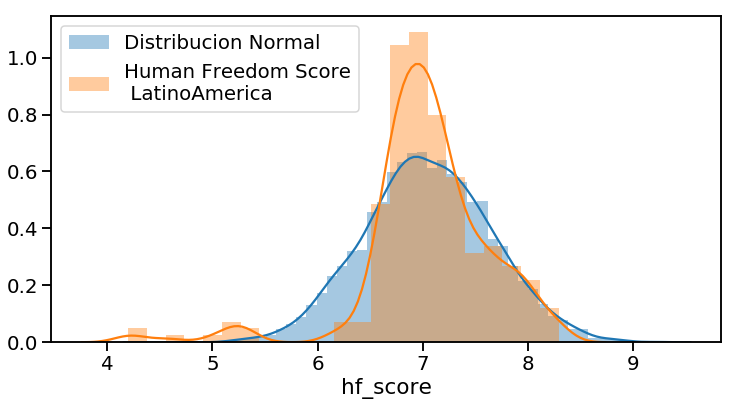

In [61]:
loc, scale = stats.norm.fit(datos_latinoamerica['hf_score'].dropna())

distribucion_normal = stats.norm(loc, scale)
muestra = distribucion_normal.rvs(10000)

plt.figure(figsize=(12,6))
seaborn.distplot(muestra, label='Distribucion Normal')
seaborn.distplot(datos_latinoamerica['hf_score'].dropna(), label='Human Freedom Score\n LatinoAmerica')

plt.legend()

***En este caso, las distribuciones de la muestra y la generada se parecen.***

***Graficamos ahora el QQ-Plot. Observamos que los valores se aproximan a una normal.***

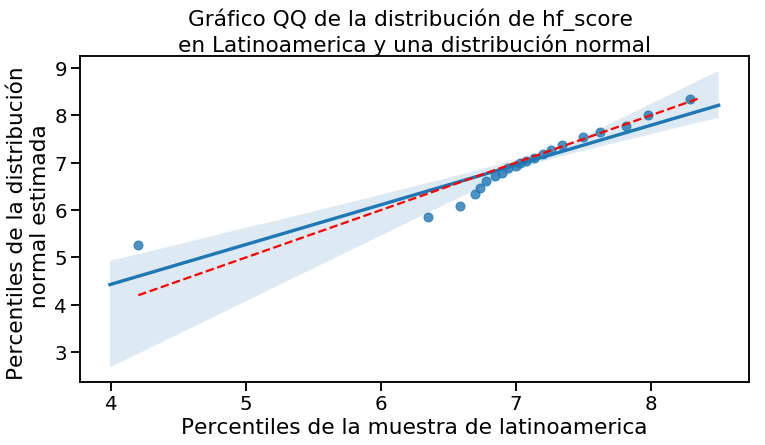

In [67]:
percentiles = numpy.linspace(0, 100, 21)
qn_muestras = numpy.percentile(datos_latinoamerica['hf_score'].dropna(), percentiles)
qn_distribucion_normal = numpy.percentile(distribucion_normal.rvs(len(datos_latinoamerica['hf_score'].dropna())), percentiles)

plt.figure(figsize=(12,6))
ax = seaborn.regplot(x=qn_muestras, y=qn_distribucion_normal)
ax.set_xlabel('Percentiles de la muestra de latinoamerica')
ax.set_ylabel('Percentiles de la distribución \n normal estimada')
ax.set_title('Gráfico QQ de la distribución de hf_score \nen Latinoamerica y una distribución normal')

x = numpy.linspace(numpy.min((qn_muestras.min(), qn_distribucion_normal.min())), numpy.max((qn_muestras.max(),qn_distribucion_normal.max())))
plt.plot(x,x, color='RED', ls="--")

***Los resultados condicen con los obtenidos en el KSTEST para el indicador hf_score, no asi para el pf_identity. Esto nos demuestra que la metodología del p-value no siempre es adecuada para determinar si una distribución es
aproximadamente normal. En algunas ocasiones, resulta necesario complementarlo con un QQ plot.***

## 3.4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

In [62]:
def asimetria_fisher(muestra):
    
    media = muestra.mean()
    desvio = muestra.std()
    
    valor_menos_media = (muestra - media)**3
    suma = numpy.sum(valor_menos_media)
        
    return suma/(len(muestra) * (desvio**3))

print('Asimetria Fisher para HF_SCORE = ', asimetria_fisher(datos_latinoamerica['hf_score'].dropna()))
print('Asimetria Fisher para PF_IDENTITY = ', asimetria_fisher(datos_latinoamerica['pf_identity'].dropna()))

Asimetria Fisher para HF_SCORE =  -1.4327783341690914
Asimetria Fisher para PF_IDENTITY =  -1.0410764737762728


***Como se observa las tres distribuciones tienen coeficiente de fisher negativo, que justifica el sesgo que poseen hacia la derecha***

In [63]:
def curtosis(muestra):
    
    media = muestra.mean()
    desvio = muestra.std()
    
    valor_menos_media = (muestra - media)**4
    suma = numpy.sum(valor_menos_media)
        
    return (suma/(len(muestra) * (desvio**4)))-3

print('Curtosis HF_SCORE = ', curtosis(datos_latinoamerica['hf_score'].dropna()))
print('Curtosis PF_IDENTITY = ', curtosis(datos_latinoamerica['pf_identity'].dropna()))

Curtosis HF_SCORE =  5.26844573498823
Curtosis PF_IDENTITY =  -0.31857094209372283


***En el caso de hf_score, los valores se concentran en la media, lo que implica una curtosis grande. 
No asi en el caso de pf_identity.***

# 4. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


## 4.1. Pairplot

/home/madoery/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/madoery/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 1440x1440 with 0 Axes>

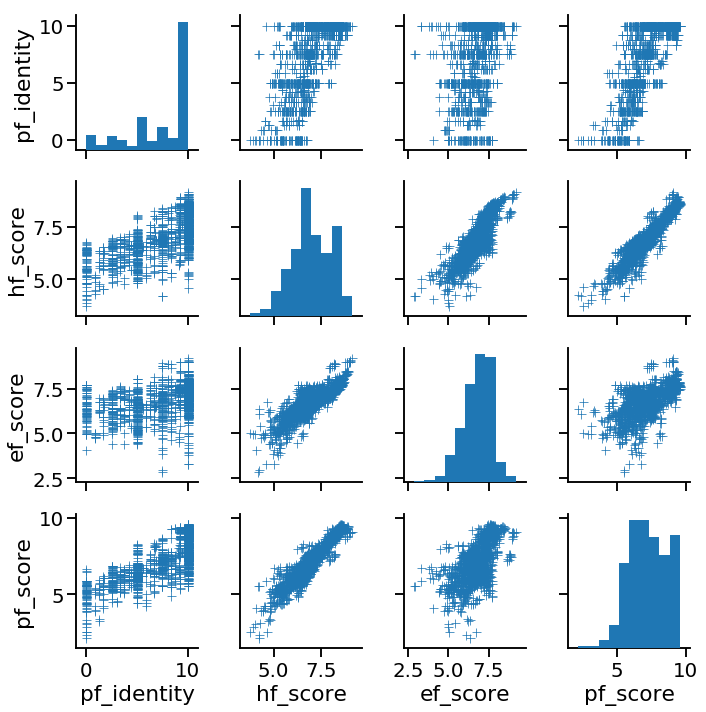

In [40]:
plt.figure(figsize=(20, 20))
seaborn.pairplot(data=dataset, vars=['pf_identity', 'hf_score', 'ef_score', "pf_score"], markers='+')

Del gráfico pairplot se puede decir que existe cierta correlación entre el índice hf_score y pf_score y entre el hf_score y el ef_score. Esto tiene sentido ya que el hf_score es el promedio de pf_score y ef_score. Aparentemente el hf_score no está dominado por una de sus dos componente si no que ambas aportan de igual manera. Lo interesante en este gráfico es que pareciera existir cierta correlación entre el ef_score y el pf_score. 

## 4.2. Gráficos de Correlación

Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.


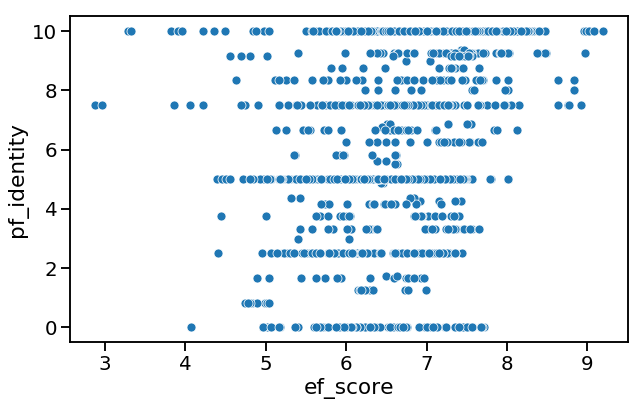

In [41]:
plt.figure(figsize=(10, 6))
ax = seaborn.scatterplot(data=dataset, x='ef_score', y='pf_identity')


## 4.3. Calculos de Covarianza y Coeficientes de Correlacion (Kendal, Spearman, Pearson)

Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 

### Covarianzas

In [42]:
datos1 = dataset['ef_score'].dropna()
datos2 = dataset['hf_score'].dropna()
datos3 = dataset['pf_identity'].dropna()

print('Covarianza Economic Freedom <-> Human Freedom = ', numpy.cov(datos1, datos2)[0][1])
print('Covarianza Economic Freedom <-> Personal Freedom = ',numpy.cov(datos1, datos3)[0][1])
print('Covarianza Human Freedom <-> Personal Freedom = ', numpy.cov(datos2, datos3)[0][1])

print('numero datos1 = ', len(datos1), ', numero datos2 = ', len(datos2), ', numero datos3 = ', len(datos3))

Covarianza Economic Freedom <-> Human Freedom =  0.7748561895051655
Covarianza Economic Freedom <-> Personal Freedom =  1.085633409943055
Covarianza Human Freedom <-> Personal Freedom =  2.196616473346225
numero datos1 =  1378 , numero datos2 =  1378 , numero datos3 =  1378


Si bien los 3 valores de correlacion dieron positivos, entre las unicas variables que existe una relacion aparente es entre hf_score y ef_score. Para corroborar la relacion lineal existente, vamos a analizar diferentes coeficientes.

### Coeficiente de Pearson

* Coeficiente de Pearson (exige que las ditros de las muestras sean normales)

In [43]:
print("PEARSON")
print('\nEf - Hf')
cols = ['ef_score', 'hf_score']
print(dataset[cols].corr(method='pearson'))

print('\nEf - Pf')
cols = ['ef_score', 'pf_identity']
print(dataset[cols].corr(method='pearson'))

print('\nHf - Pf')
cols = ['hf_score', 'pf_identity']
print(dataset[cols].corr(method='pearson'))

PEARSON

Ef - Hf
          ef_score  hf_score
ef_score  1.000000  0.854865
hf_score  0.854865  1.000000

Ef - Pf
             ef_score  pf_identity
ef_score     1.000000     0.388877
pf_identity  0.388877     1.000000

Hf - Pf
             hf_score  pf_identity
hf_score     1.000000     0.677754
pf_identity  0.677754     1.000000


### Coeficiente de Spearman

In [44]:
print("SPEARMAN")
print('\nEf - Hf')
cols = ['ef_score'] + ['hf_score']
print(dataset[cols].corr(method='spearman'))

print('\nEf - Pf')
cols = ['ef_score'] + ['pf_identity']
print(dataset[cols].corr(method='spearman'))

print('\nHf - Pf')
cols = ['hf_score'] + ['pf_identity']
print(dataset[cols].corr(method='spearman'))

SPEARMAN

Ef - Hf
          ef_score  hf_score
ef_score  1.000000  0.860647
hf_score  0.860647  1.000000

Ef - Pf
             ef_score  pf_identity
ef_score     1.000000     0.426993
pf_identity  0.426993     1.000000

Hf - Pf
             hf_score  pf_identity
hf_score     1.000000     0.686109
pf_identity  0.686109     1.000000


### Coeficiente de Kendall

In [45]:
print("KENDALL -> Variables Ordinales")
print('\nEf - Hf')
cols = ['ef_score'] + ['hf_score']
print(dataset[cols].corr(method='kendall'))

print('\nEf - Pf')
cols = ['ef_score'] + ['pf_identity']
print(dataset[cols].corr(method='kendall'))

print('\nHf - Pf')
cols = ['hf_score'] + ['pf_identity']
print(dataset[cols].corr(method='kendall'))

KENDALL -> Variables Ordinales

Ef - Hf
          ef_score  hf_score
ef_score  1.000000  0.681062
hf_score  0.681062  1.000000

Ef - Pf
             ef_score  pf_identity
ef_score      1.00000      0.30812
pf_identity   0.30812      1.00000

Hf - Pf
             hf_score  pf_identity
hf_score      1.00000      0.52131
pf_identity   0.52131      1.00000


***En los tres casos vemos que el economic freedom score y human freedom score dan un alto nivel de correlacion lineal***